In [4]:
from bed_reader import open_bed

bed = open_bed("/home/shussain/popviz/genomic_data/hgdp_QC_IMP.bed").read()
bed

array([[2., 0., 2., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 2., 0., ..., 1., 0., 0.]], dtype=float32)

In [6]:
import pandas as pd
import numpy as np

pops = pd.read_csv("/home/shussain/popviz/pops.csv")
pops

,ID,Sex,population,geographic_origin,region,pop_group
0,HGDP00448,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
1,HGDP00479,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
2,HGDP00985,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
3,HGDP01094,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
4,HGDP00982,M,Mbuti_Pygmies,Democratic_Republic_of_Congo,Subsaharian_Africa,Africa
...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Asia,Est_Asia
1039,HGDP01070,F,Sardinian,Italy,Europe,Europe
1040,HGDP01376,M,French_Basque,France,Europe,Europe
1041,HGDP00671,M,Sardinian,Italy,Europe,Europe


In [13]:
from tqdm import tqdm
uniq = pops["pop_group"].unique()

In [14]:
centroids = {pop_group: np.mean(bed[pops["pop_group"] == pop_group, :], axis=0) for pop_group in tqdm(uniq)}
centroids


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:25<00:00,  3.61s/it]


{'Africa': array([1.214876  , 0.18181819, 0.92561984, ..., 0.8595041 , 0.38016528,
        0.14049587], dtype=float32),
 'Middle_Est': array([0.52840906, 0.38636363, 0.4715909 , ..., 0.6818182 , 0.13068181,
        0.09090909], dtype=float32),
 'Central_South_Asia': array([0.47342995, 0.4299517 , 0.35748792, ..., 0.4009662 , 0.09661835,
        0.06280193], dtype=float32),
 'Est_Asia': array([0.19574468, 0.7404255 , 0.2       , ..., 0.3148936 , 0.0680851 ,
        0.07234043], dtype=float32),
 'Oceania': array([0.1388889 , 0.8611111 , 0.05555556, ..., 1.3333334 , 1.4444444 ,
        1.3888888 ], dtype=float32),
 'Europe': array([0.28125, 0.2125 , 0.36875, ..., 0.56875, 0.11875, 0.09375],
       dtype=float32),
 'America': array([0.5740741 , 0.17592593, 0.06481481, ..., 0.2037037 , 0.        ,
        0.        ], dtype=float32)}

In [21]:
centroids_a = np.array([np.mean(bed[pops["pop_group"] == pop_group, :], axis=0) for pop_group in tqdm(uniq)])
centroids_a


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:23<00:00,  3.42s/it]


array([[1.214876  , 0.18181819, 0.92561984, ..., 0.8595041 , 0.38016528,
        0.14049587],
       [0.52840906, 0.38636363, 0.4715909 , ..., 0.6818182 , 0.13068181,
        0.09090909],
       [0.47342995, 0.4299517 , 0.35748792, ..., 0.4009662 , 0.09661835,
        0.06280193],
       ...,
       [0.1388889 , 0.8611111 , 0.05555556, ..., 1.3333334 , 1.4444444 ,
        1.3888888 ],
       [0.28125   , 0.2125    , 0.36875   , ..., 0.56875   , 0.11875   ,
        0.09375   ],
       [0.5740741 , 0.17592593, 0.06481481, ..., 0.2037037 , 0.        ,
        0.        ]], dtype=float32)

In [22]:
from sklearn.metrics import pairwise_distances

pw_centroid_dist = pairwise_distances(centroids_a)
pw_centroid_dist

array([[  0.      , 329.4949  , 345.3664  , 399.21698 , 442.31204 ,
        370.41403 , 458.74387 ],
       [329.4949  ,   0.      , 127.3427  , 286.02454 , 360.65277 ,
        106.082924, 352.86133 ],
       [345.3664  , 127.3427  ,   0.      , 228.49055 , 328.81387 ,
        128.58296 , 310.36252 ],
       [399.21698 , 286.02454 , 228.49055 ,   0.      , 324.15033 ,
        286.49985 , 284.82816 ],
       [442.31204 , 360.65277 , 328.81387 , 324.15033 ,   0.      ,
        366.50424 , 409.24365 ],
       [370.41403 , 106.082924, 128.58296 , 286.49985 , 366.50424 ,
          0.      , 346.3085  ],
       [458.74387 , 352.86133 , 310.36252 , 284.82816 , 409.24365 ,
        346.3085  ,   0.      ]], dtype=float32)

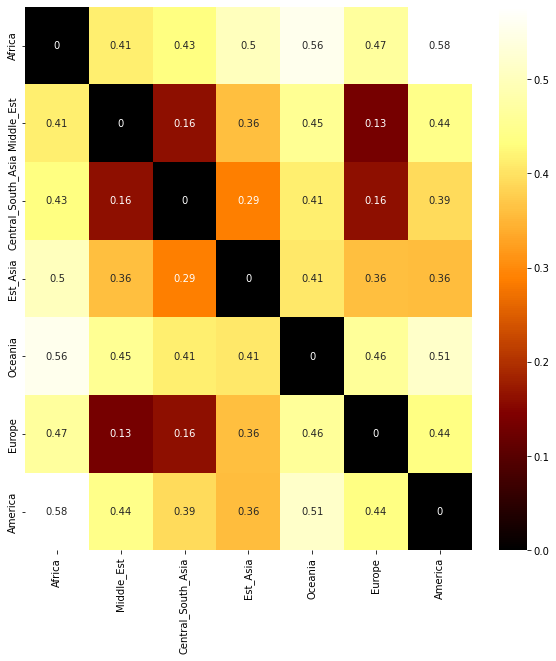

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(pw_centroid_dist/795.42566, annot=True, xticklabels=uniq, yticklabels=uniq, cmap='afmhot')
plt.savefig("heat.jpeg")

In [19]:
dist = np.load("pw_euc_dist.npy")
max_d = np.max(dist)
max_d

795.42566

In [16]:
centroids["America"].shape

(631634,)